In [1]:
from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [2]:
from keras.utils import to_categorical
import numpy as np
from keras import *
from keras.datasets import mnist
from collections import Counter
import tensorflow as tf
import matplotlib.pyplot as plt
import random

Using TensorFlow backend.


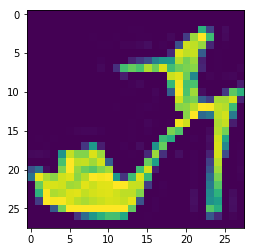

In [3]:
cur_img=np.reshape(train_images[9],(28,28))
plt.imshow(cur_img)

In [4]:
def group_list(l, group_size):

    for i in range(0, len(l), group_size):
        yield l[i:i+group_size]

In [5]:
train_images=train_images.reshape((60000, 28*28))
train_images=train_images.astype('float32')/255 #정규화

test_images=test_images.reshape((10000, 28*28))
test_images=test_images.astype('float32')/255

In [6]:
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [7]:
learning_rate=0.001
training_epochs=15
batch_size=100

In [10]:
tf.reset_default_graph() #그래프에 있는 모든 텐서를 초기화
x=tf.placeholder(tf.float32, [None, 28*28])
ximg=tf.reshape(x, [-1, 28,28,1])# img 28*28*1(black)
y=tf.placeholder(tf.float32,[None, 10])

w1=tf.Variable(tf.random_normal([3,3,1,32]))
L1=tf.nn.conv2d(ximg, w1, strides=[1,1,1,1],padding='SAME')
L1=tf.nn.relu(L1)
L1=tf.nn.max_pool(L1, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
#L1 이미지 shape => (?, 7, 7, 32)


w2=tf.Variable(tf.random_normal([3,3,32,64]))
L2=tf.nn.conv2d(L1, w2, strides=[1,1,1,1],padding='SAME')
L2=tf.nn.relu(L2)
L2=tf.nn.max_pool(L2, ksize=[1,2,2,1], strides=[1,2,2,1], padding='SAME')
#conv2d(?, 14, 14, 64)
#relu(?, 14, 14, 64)
#max_pool(?, 7, 7, 64)
L2_flat=tf.reshape(L2,[-1,7*7*64])

w3=tf.get_variable("w3",shape=[7*7*64,10],initializer=tf.contrib.layers.xavier_initializer())
b=tf.Variable(tf.random_normal([10]))
logits=tf.matmul(L2_flat, w3)+b
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits
               (logits=logits, labels=y))
train=tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
              

NameError: name 'hf' is not defined

In [ ]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        total_batch=int(60000/batch_size)
        avg_cost=0
        x_batch = group_list(train_images, batch_size)
        y_batch = group_list(train_labels, batch_size)
        for i in range(total_batch):
            batch_xs = next(x_batch)
            batch_ys = next(y_batch)
            
            myfeed={x:batch_xs, y:batch_ys}
            cv,_=sess.run([cost, train], feed_dict=myfeed)
            avg_cost+=cv/total_batch
        print("Epoch:",'%4d' %(epoch+1),
             'cost:', '{:.9f}'.format(avg_cost))
    c_pre=tf.equal(tf.argmax(hf, 1), tf.argmax(y,1))
    acc=tf.reduce_mean(tf.cast(c_pre, tf.float32))
    print(sess.run(acc, feed_dict={x:train_images, y:train_labels}))
    
    r=random.randint(0,10000-1)
    print("Label:", sess.run(tf.argmax(train_labels[r:r+1],1)))
    print("Prediction:",sess.run(tf.argmax(hf,1),feed_dict={x:train_images[r:r+1]}))
    plt.imshow(train_images[r:r+1].reshape(28,28))
    plt.show

Epoch:    1 cost: 1.665968158
Epoch:    2 cost: 0.668854086
Epoch:    3 cost: 0.483075055
Epoch:    4 cost: 0.367905226
